# Regresión
En una regresión lo que queremos es obtener uno o más valores concretos, no clases. Es como si quisieramos un resultado de una operación matemática. Vemos un ejemplo de una red de regresión que queremos que aprenda a sumar 3 números. 

Primero generamos número aleatorios:


In [45]:
import numpy as np
#Generamos training set con 1000 datos. 
X1 = np.random.uniform(size = 1000) * 100
X2 = np.random.uniform(size = 1000) * 100
X3 = np.random.uniform(size = 1000) * 100
X = np.transpose([X1, X2, X3])


(1000, 3) (1000,)


Este seran nuestro valores de entrada o *inputs*. Los *outputs* de nuestro problema serán la suma de los números,

In [46]:
Y = X1 + X2 + X3  


Ahora que ya tenemos un set de ejemplo. Volvemos a separar los datos en set de entrenamiento y set de validación

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y) 
np.shape(y_train),np.shape(y_test) # comprobamos tamaño

((750,), (250,))

Usamos el objeto `MLPRegressor` para definir las características de la red. La **batch_size** no la hemos tocado antes, por defecto toman un valor que dependerá del método de optimización escogido, pero la podríamos cambiar si nos interesa. 

In [22]:
from sklearn.neural_network import MLPRegressor
# Escojo 3 capas de 10 neuronas
mlp = MLPRegressor(hidden_layer_sizes=(10),max_iter=500,verbose=True) 

Y entrenamos

In [23]:
mlp.fit(X_train,y_train) # usa modelo red neuronal que hemos definido antes y(x,w)
# mlp.loss_curve en Clasificación te guarda el valor de la función coste a cada iteración

Iteration 1, loss = 10020.40050238
Iteration 2, loss = 9746.19371920
Iteration 3, loss = 9473.84156895
Iteration 4, loss = 9202.16829646
Iteration 5, loss = 8936.30231243
Iteration 6, loss = 8673.06099675
Iteration 7, loss = 8414.58797085
Iteration 8, loss = 8158.67711758
Iteration 9, loss = 7906.31082492
Iteration 10, loss = 7652.56100315
Iteration 11, loss = 7406.18401139
Iteration 12, loss = 7162.59688649
Iteration 13, loss = 6918.53912703
Iteration 14, loss = 6680.17128104
Iteration 15, loss = 6441.52052095
Iteration 16, loss = 6205.91973031
Iteration 17, loss = 5976.07290120
Iteration 18, loss = 5742.77546582
Iteration 19, loss = 5518.22805612
Iteration 20, loss = 5289.63580021
Iteration 21, loss = 5066.00925444
Iteration 22, loss = 4843.54076574
Iteration 23, loss = 4620.72275385
Iteration 24, loss = 4396.76389937
Iteration 25, loss = 4168.82322654
Iteration 26, loss = 3942.61594980
Iteration 27, loss = 3716.67943924
Iteration 28, loss = 3486.26994767
Iteration 29, loss = 3266.07

Iteration 309, loss = 1.76361722
Iteration 310, loss = 1.75239578
Iteration 311, loss = 1.74217582
Iteration 312, loss = 1.73233570
Iteration 313, loss = 1.72218428
Iteration 314, loss = 1.71292222
Iteration 315, loss = 1.70420056
Iteration 316, loss = 1.69537127
Iteration 317, loss = 1.68704564
Iteration 318, loss = 1.67904849
Iteration 319, loss = 1.67066304
Iteration 320, loss = 1.66344366
Iteration 321, loss = 1.65613086
Iteration 322, loss = 1.64845130
Iteration 323, loss = 1.64179330
Iteration 324, loss = 1.63527411
Iteration 325, loss = 1.62890347
Iteration 326, loss = 1.62214046
Iteration 327, loss = 1.61598888
Iteration 328, loss = 1.61037203
Iteration 329, loss = 1.60409478
Iteration 330, loss = 1.59912844
Iteration 331, loss = 1.59301975
Iteration 332, loss = 1.58811885
Iteration 333, loss = 1.58289647
Iteration 334, loss = 1.57798794
Iteration 335, loss = 1.57297802
Iteration 336, loss = 1.56810917
Iteration 337, loss = 1.56375606
Iteration 338, loss = 1.55900610
Iteration 

/Users/casaponsa/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=10, max_iter=500, verbose=True)

Text(0, 0.5, 'loss function')

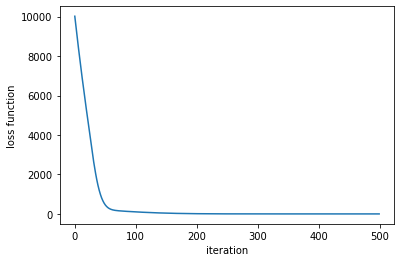

In [24]:
import matplotlib.pyplot as pl
pl.plot(mlp.loss_curve_)  # mlp.loss_curve nos da una idea de como converge el training set
pl.xlabel('iteration')
pl.ylabel('loss function')

Hacemos las predicciones con el set de validación y hacemos algún cálculo para ver si se parecen con los valores reales. Aquí calculo el coeficiente de correlación (que debería ser 1) y el error relativo. 

coeficiente correlación 0.999354649801217
error relativo 0.7281247567830477


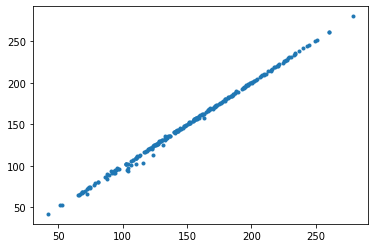

In [25]:
predictions = mlp.predict(X_test) # estimamos resultado con el TEST
print('coeficiente correlación', np.corrcoef(predictions,y_test)[0][1] ) # calculamos correlación con el valor esperado
print('error relativo', np.mean(abs(predictions-y_test)/y_test)*100)  # calculamos correlación con el valor esperado


import matplotlib.pyplot as pl
pl.plot(predictions,y_test,'.')


Le pido a la red que sume 10 + 2 + 6

In [36]:
A=np.array([10, 2, 6]).reshape(1,-1) # sklearn necesita que se lo de dimension(1,n)
print('la suma predicha es', np.round(mlp.predict(A))) # redondamos
print('la suma real es',np.round(np.sum(A)))

la suma predicha es [18.]
la suma real es 18


Le pido a la red que sume 100 + 100 + 100

In [37]:
# si miramos valores muy lejos del rango
A=np.array([100,100,100]).reshape(1,-1) 
np.shape(A)
print('la suma predicha es', np.round(mlp.predict(A))) # redondamos
print('la suma real es',np.round(np.sum(A)))

la suma predicha es [299.]
la suma real es 300


Y ahora Le pido a la red que sume 1000 + 1000 + 1000

In [44]:
# si miramos valores muy lejos del rango
A=np.array([2000,1050,4000]).reshape(1,-1) 
np.shape(A)
print('la suma predicha es', np.round(mlp.predict(A))) # redondamos
print('la suma real es',np.round(np.sum(A)))

la suma predicha es [7019.]
la suma real es 7050


**NO ha aprendido a sumar!** Ha ajustado muy bien los datos pero a la que me alejo del rango (0,100) se equivoca

## Ejercicios: 

1. Haz pruebas con esta red para ver si mejoras los resultados. Para mejorar un ajuste puedes probar:

* cambiar el número de neuronas o capas 

* Parámetros del MPLRegressor como función de activación, optimizer, loss_function, batch_size,...

* Añadir más datos, usamos cuantos más datos mejor, hasta que veamos que añadir más datos no mejora la solución.

2. Entrena una red para que aprenda a multiplicar 4 números.